<a href="https://colab.research.google.com/github/Samiratu/ncds-predictions/blob/master/diseases_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# libraries for building the neural network
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(2)


In [ ]:
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 labelencoder= LabelEncoder() #initializing an object of class LabelEncoder

In [ ]:
breast_cancer = pd.read_csv('/content/drive/My Drive/disease-data/data.csv')
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
breast_cancer.shape

(569, 33)

In [ ]:
diabetes = pd.read_csv('/content/drive/My Drive/disease-data//diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.shape

(768, 9)

In [ ]:
heart = pd.read_csv('/content/drive/My Drive/disease-data//heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart.shape

(303, 14)

In [ ]:
cervical = pd.read_csv('/content/drive/My Drive/disease-data//kag_risk_factors_cervical_cancer.csv')
cervical.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [ ]:
cervical.shape

(858, 36)

In [ ]:
def null_proportion(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
    missing_value_df.sort_values('percent_missing', inplace=True)
    return missing_value_df
    

### Preprocessing breast cancer data

In [ ]:
null_proportion(breast_cancer)

,column_name,percent_missing
id,id,0.0
symmetry_worst,symmetry_worst,0.0
concave points_worst,concave points_worst,0.0
concavity_worst,concavity_worst,0.0
compactness_worst,compactness_worst,0.0
smoothness_worst,smoothness_worst,0.0
area_worst,area_worst,0.0
perimeter_worst,perimeter_worst,0.0
texture_worst,texture_worst,0.0
radius_worst,radius_worst,0.0


In [ ]:
def preprocess_bcancer(df1):
    df1.drop('Unnamed: 32', axis=1, inplace = True)
    df1['diagnosis'] = labelencoder.fit_transform(df1['diagnosis'])
preprocess_bcancer(breast_cancer)

In [ ]:
print(breast_cancer.corr()["diagnosis"].abs().sort_values(ascending=False))

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0

###  Creating a new breast cancer dataframe with the first 8 features that are highlt correlated to the target

In [ ]:
bcancer_df = breast_cancer[['concave points_worst', 'concave points_mean', 'perimeter_worst', 'perimeter_mean', 'radius_worst', 'radius_mean', 'area_worst', 'area_mean','diagnosis']]
bcancer_df.head()

,concave points_worst,concave points_mean,perimeter_worst,perimeter_mean,radius_worst,radius_mean,area_worst,area_mean,diagnosis
0,0.2654,0.14710,184.60,122.80,25.38,17.99,2019.0,1001.0,1
1,0.1860,0.07017,158.80,132.90,24.99,20.57,1956.0,1326.0,1
2,0.2430,0.12790,152.50,130.00,23.57,19.69,1709.0,1203.0,1
3,0.2575,0.10520,98.87,77.58,14.91,11.42,567.7,386.1,1
4,0.1625,0.10430,152.20,135.10,22.54,20.29,1575.0,1297.0,1


### Preprocessing Diabetes Data

In [ ]:
null_proportion(diabetes)

,column_name,percent_missing
Pregnancies,Pregnancies,0.0
Glucose,Glucose,0.0
BloodPressure,BloodPressure,0.0
SkinThickness,SkinThickness,0.0
Insulin,Insulin,0.0
BMI,BMI,0.0
DiabetesPedigreeFunction,DiabetesPedigreeFunction,0.0
Age,Age,0.0
Outcome,Outcome,0.0


### Preprocessing Heart Disease Data

In [ ]:
null_proportion(heart)

,column_name,percent_missing
age,age,0.0
sex,sex,0.0
cp,cp,0.0
trestbps,trestbps,0.0
chol,chol,0.0
fbs,fbs,0.0
restecg,restecg,0.0
thalach,thalach,0.0
exang,exang,0.0
oldpeak,oldpeak,0.0


In [ ]:
print(heart.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


###  Creating a new heart disease dataframe with the first 8 features that are highly correlated to the target

In [ ]:
heart_df = heart[['exang' ,'cp' ,'oldpeak', 'thalach' ,'ca','slope','thal','sex','target']]
heart_df.head()

,exang,cp,oldpeak,thalach,ca,slope,thal,sex,target
0,0,3,2.3,150,0,0,1,1,1
1,0,2,3.5,187,0,0,2,1,1
2,0,1,1.4,172,0,2,2,0,1
3,0,1,0.8,178,0,2,2,1,1
4,1,0,0.6,163,0,2,2,0,1


### Preprocessing Cervical Cancer Data

In [ ]:
cervical = cervical.replace('?', np.nan)

In [ ]:
null_proportion(cervical)

,column_name,percent_missing
Age,Age,0.000000
Schiller,Schiller,0.000000
Hinselmann,Hinselmann,0.000000
Dx,Dx,0.000000
Dx:HPV,Dx:HPV,0.000000
Dx:CIN,Dx:CIN,0.000000
Dx:Cancer,Dx:Cancer,0.000000
STDs: Number of diagnosis,STDs: Number of diagnosis,0.000000
Citology,Citology,0.000000
Biopsy,Biopsy,0.000000


In [ ]:
cervical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           832 non-null    object
 2   First sexual intercourse            851 non-null    object
 3   Num of pregnancies                  802 non-null    object
 4   Smokes                              845 non-null    object
 5   Smokes (years)                      845 non-null    object
 6   Smokes (packs/year)                 845 non-null    object
 7   Hormonal Contraceptives             750 non-null    object
 8   Hormonal Contraceptives (years)     750 non-null    object
 9   IUD                                 741 non-null    object
 10  IUD (years)                         741 non-null    object
 11  STDs                                753 non-null    object

### Convert object data types to numeric

In [ ]:
cervical = cervical.apply(pd.to_numeric)

## Preprocessing Cervical Cancer Data

### Drop 'Time since first diagnosis' and 'Time since last diagnosis' because it has more that 50% of null values

In [ ]:
cervical.drop('STDs: Time since first diagnosis', axis=1, inplace = True)
cervical.drop('STDs: Time since last diagnosis', axis=1, inplace = True)

In [ ]:
cervical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

### Filling continous variables with the median and categorical with the mode

In [ ]:
cervical['Number of sexual partners'] = cervical['Number of sexual partners'].fillna(cervical['Number of sexual partners'].median())
cervical['First sexual intercourse'] = cervical['First sexual intercourse'].fillna(cervical['First sexual intercourse'].median())
cervical['Num of pregnancies'] = cervical['Num of pregnancies'].fillna(cervical['Num of pregnancies'].median())
# cervical['Smokes'] = cervical['Smokes'].fillna(1)
cervical['Smokes'] = cervical['Smokes'].fillna(cervical['Smokes'].mode()[0])
cervical['Smokes (years)'] = cervical['Smokes (years)'].fillna(cervical['Smokes (years)'].median())
cervical['Smokes (packs/year)'] = cervical['Smokes (packs/year)'].fillna(cervical['Smokes (packs/year)'].median())
# cervical['Hormonal Contraceptives'] = cervical['Hormonal Contraceptives'].fillna(1)
cervical['Hormonal Contraceptives'] = cervical['Hormonal Contraceptives'].fillna(cervical['Hormonal Contraceptives'].mode()[0])
cervical['Hormonal Contraceptives (years)'] = cervical['Hormonal Contraceptives (years)'].fillna(cervical['Hormonal Contraceptives (years)'].median())
# cervical['IUD'] = cervical['IUD'].fillna(0) # Under suggestion
cervical['IUD'] = cervical['IUD'].fillna(cervical['IUD'].mode()[0])
# cervical['IUD (years)'] = cervical['IUD (years)'].fillna(0) #Under suggestion
cervical['IUD (years)'] = cervical['IUD (years)'].fillna(cervical['IUD (years)'].mode()[0])
# cervical['STDs'] = cervical['STDs'].fillna(1)
cervical['STDs'] = cervical['STDs'].fillna(cervical['STDs'].mode()[0])
cervical['STDs (number)'] = cervical['STDs (number)'].fillna(cervical['STDs (number)'].median())
cervical['STDs:condylomatosis'] = cervical['STDs:condylomatosis'].fillna(cervical['STDs:condylomatosis'].median())
cervical['STDs:cervical condylomatosis'] = cervical['STDs:cervical condylomatosis'].fillna(cervical['STDs:cervical condylomatosis'].median())
cervical['STDs:vaginal condylomatosis'] = cervical['STDs:vaginal condylomatosis'].fillna(cervical['STDs:vaginal condylomatosis'].median())
cervical['STDs:vulvo-perineal condylomatosis'] = cervical['STDs:vulvo-perineal condylomatosis'].fillna(cervical['STDs:vulvo-perineal condylomatosis'].median())
cervical['STDs:syphilis'] = cervical['STDs:syphilis'].fillna(cervical['STDs:syphilis'].median())
cervical['STDs:pelvic inflammatory disease'] = cervical['STDs:pelvic inflammatory disease'].fillna(cervical['STDs:pelvic inflammatory disease'].median())
cervical['STDs:genital herpes'] = cervical['STDs:genital herpes'].fillna(cervical['STDs:genital herpes'].median())
cervical['STDs:molluscum contagiosum'] = cervical['STDs:molluscum contagiosum'].fillna(cervical['STDs:molluscum contagiosum'].median())
cervical['STDs:AIDS'] = cervical['STDs:AIDS'].fillna(cervical['STDs:AIDS'].median())
cervical['STDs:HIV'] = cervical['STDs:HIV'].fillna(cervical['STDs:HIV'].median())
cervical['STDs:Hepatitis B'] = cervical['STDs:Hepatitis B'].fillna(cervical['STDs:Hepatitis B'].median())
cervical['STDs:HPV'] = cervical['STDs:HPV'].fillna(cervical['STDs:HPV'].median())

In [ ]:
cervical.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [ ]:
cervical.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0


###  Correlation od features with the target (Biopsy)

In [ ]:
print(cervical.corr()["Biopsy"].abs().sort_values(ascending=False))

Biopsy                                1.000000
Schiller                              0.733204
Hinselmann                            0.547417
Citology                              0.327466
Dx:Cancer                             0.160905
Dx:HPV                                0.160905
Dx                                    0.157607
STDs:genital herpes                   0.130523
STDs:HIV                              0.127702
STDs                                  0.114148
Dx:CIN                                0.113172
STDs (number)                         0.103153
STDs: Number of diagnosis             0.097449
Hormonal Contraceptives (years)       0.094164
STDs:vulvo-perineal condylomatosis    0.092548
STDs:condylomatosis                   0.090164
Smokes (years)                        0.061204
IUD                                   0.059231
Age                                   0.055956
Num of pregnancies                    0.040215
STDs:syphilis                         0.038311
IUD (years)  

###  Creating a new heart disease dataframe with the first 8 features that are highly correlated to the Biopsy

In [ ]:
cervical_df = cervical[['Dx:Cancer' ,'Dx:HPV','Dx','STDs:genital herpes','STDs:HIV', 'STDs', 'Dx:CIN', 'STDs (number)','Biopsy']]
cervical_df.head()

,Dx:Cancer,Dx:HPV,Dx,STDs:genital herpes,STDs:HIV,STDs,Dx:CIN,STDs (number),Biopsy
0,0,0,0,0.0,0.0,0.0,0,0.0,0
1,0,0,0,0.0,0.0,0.0,0,0.0,0
2,0,0,0,0.0,0.0,0.0,0,0.0,0
3,1,1,0,0.0,0.0,0.0,0,0.0,0
4,0,0,0,0.0,0.0,0.0,0,0.0,0


In [ ]:
cervical_df.info

<bound method DataFrame.info of      Dx:Cancer  Dx:HPV  Dx  ...  Dx:CIN  STDs (number)  Biopsy
0            0       0   0  ...       0            0.0       0
1            0       0   0  ...       0            0.0       0
2            0       0   0  ...       0            0.0       0
3            1       1   0  ...       0            0.0       0
4            0       0   0  ...       0            0.0       0
..         ...     ...  ..  ...     ...            ...     ...
853          0       0   0  ...       0            0.0       0
854          0       0   0  ...       0            0.0       0
855          0       0   0  ...       0            0.0       0
856          0       0   0  ...       0            0.0       0
857          0       0   0  ...       0            0.0       0

[858 rows x 9 columns]>

### Data Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
# Funtion for normalizing data
def normalizeData(X, Y):
    Y = normalizer.fit_transform(Y)
    X = normalizer.fit_transform(X)

# Create, Train, and Visualize Model for Heart Disease

Initial Model Without Optimization

In [ ]:
hmodel = Sequential()
hmodel.add(Dense(5,activation='relu',input_dim=8))
hmodel.add(Dense(1,activation='sigmoid'))
print(hmodel.summary())
hmodel.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 5)                 45        
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 6         
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
heart_model = Sequential()
heart_model.add(Dense(units=10, input_dim=8, kernel_initializer='uniform', activation='relu'))
heart_model.add(Dropout(0.4))
heart_model.add(Dense(units=3, input_dim=8, kernel_initializer='uniform', activation='relu'))
heart_model.add(Dropout(0.4))
heart_model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
print(heart_model.summary())
heart_model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 10)                90        
_________________________________________________________________
dropout_9 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 3)                 33        
_________________________________________________________________
dropout_10 (Dropout)         (None, 3)                 0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 4         
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
heart_df.head()

,exang,cp,oldpeak,thalach,ca,slope,thal,sex,target
0,0,3,2.3,150,0,0,1,1,1
1,0,2,3.5,187,0,0,2,1,1
2,0,1,1.4,172,0,2,2,0,1
3,0,1,0.8,178,0,2,2,1,1
4,1,0,0.6,163,0,2,2,0,1


### Normalize data

In [ ]:
# split data into X and Y train
Yh = heart_df[['target']]
Xh = heart_df.drop(['target'],axis=1)
normalizeData(Xh, Yh)

In [ ]:
Xh.head()

,exang,cp,oldpeak,thalach,ca,slope,thal,sex
0,0,3,2.3,150,0,0,1,1
1,0,2,3.5,187,0,0,2,1
2,0,1,1.4,172,0,2,2,0
3,0,1,0.8,178,0,2,2,1
4,1,0,0.6,163,0,2,2,0


In [ ]:
# Split data into train and test
Xh_train, Xh_test, yh_train, yh_test = train_test_split(Xh, Yh, test_size=0.2, random_state=43)

### Function for Ploting training History

In [ ]:
def plot_training_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

In [ ]:
train_history = hmodel.fit(x=Xh_train, y = yh_train, validation_split=0.2, epochs=300, batch_size=25, verbose=2)

Epoch 1/300
8/8 - 0s - loss: 17.3689 - accuracy: 0.5544 - val_loss: 17.7705 - val_accuracy: 0.5102
Epoch 2/300
8/8 - 0s - loss: 16.5102 - accuracy: 0.5544 - val_loss: 16.8513 - val_accuracy: 0.5102
Epoch 3/300
8/8 - 0s - loss: 15.6419 - accuracy: 0.5544 - val_loss: 15.9672 - val_accuracy: 0.5102
Epoch 4/300
8/8 - 0s - loss: 14.8102 - accuracy: 0.5544 - val_loss: 15.1021 - val_accuracy: 0.5102
Epoch 5/300
8/8 - 0s - loss: 14.0099 - accuracy: 0.5544 - val_loss: 14.2566 - val_accuracy: 0.5102
Epoch 6/300
8/8 - 0s - loss: 13.1994 - accuracy: 0.5544 - val_loss: 13.4481 - val_accuracy: 0.5102
Epoch 7/300
8/8 - 0s - loss: 12.4305 - accuracy: 0.5544 - val_loss: 12.6603 - val_accuracy: 0.5102
Epoch 8/300
8/8 - 0s - loss: 11.7151 - accuracy: 0.5544 - val_loss: 11.8740 - val_accuracy: 0.5102
Epoch 9/300
8/8 - 0s - loss: 10.9655 - accuracy: 0.5544 - val_loss: 11.1376 - val_accuracy: 0.5102
Epoch 10/300
8/8 - 0s - loss: 10.2699 - accuracy: 0.5544 - val_loss: 10.4135 - val_accuracy: 0.5102
Epoch 11/

In [ ]:
train_history = heart_model.fit(x=Xh_train, y = yh_train, validation_split=0.2, epochs=300, batch_size=25, verbose=2)

Epoch 1/300
8/8 - 0s - loss: 0.6921 - accuracy: 0.5285 - val_loss: 0.6926 - val_accuracy: 0.5102
Epoch 2/300
8/8 - 0s - loss: 0.6921 - accuracy: 0.5544 - val_loss: 0.6924 - val_accuracy: 0.5102
Epoch 3/300
8/8 - 0s - loss: 0.6907 - accuracy: 0.5544 - val_loss: 0.6920 - val_accuracy: 0.5102
Epoch 4/300
8/8 - 0s - loss: 0.6885 - accuracy: 0.5544 - val_loss: 0.6914 - val_accuracy: 0.5102
Epoch 5/300
8/8 - 0s - loss: 0.6906 - accuracy: 0.5544 - val_loss: 0.6910 - val_accuracy: 0.5102
Epoch 6/300
8/8 - 0s - loss: 0.6870 - accuracy: 0.5544 - val_loss: 0.6905 - val_accuracy: 0.5102
Epoch 7/300
8/8 - 0s - loss: 0.6859 - accuracy: 0.5544 - val_loss: 0.6898 - val_accuracy: 0.5102
Epoch 8/300
8/8 - 0s - loss: 0.6837 - accuracy: 0.5544 - val_loss: 0.6893 - val_accuracy: 0.5102
Epoch 9/300
8/8 - 0s - loss: 0.6731 - accuracy: 0.5544 - val_loss: 0.6886 - val_accuracy: 0.5102
Epoch 10/300
8/8 - 0s - loss: 0.6846 - accuracy: 0.5544 - val_loss: 0.6884 - val_accuracy: 0.5102
Epoch 11/300
8/8 - 0s - loss:

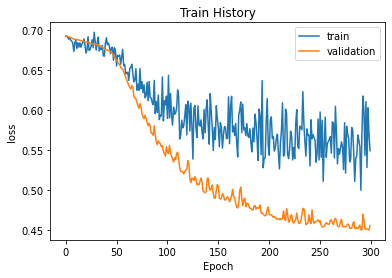

In [ ]:
#visualize the loss and accuracy after each epoch
# plot_training_history(train_history,'accuracy','val_accuracy')
plot_training_history(train_history,'loss','val_loss')


### Making Predictions with Initial Model

> Indented block



In [ ]:
yhi_pred = hmodel.predict(Xh_test)


rounded = [round(x[0]) for x in yhi_pred]
yhi_pred = rounded

from sklearn.metrics import accuracy_score
score_h = round(accuracy_score(yhi_pred,yh_test)*100,2)

print("The accuracy score of the initial model on the Test set is: "+str(score_h)+" %")

The accuracy score of the initial model on the Test set is: 80.33 %


Making Predictions with Optimized Model

In [ ]:
yh_pred = heart_model.predict(Xh_test)


rounded = [round(x[0]) for x in yh_pred]
yh_pred = rounded

from sklearn.metrics import accuracy_score
score_nn = round(accuracy_score(yh_pred,yh_test)*100,2)

print("The accuracy score of the optimized model on the Test set is: "+str(score_nn)+" %")

The accuracy score of the optimized model on the Test set is: 91.8 %


In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[24  4]
 [ 1 32]]


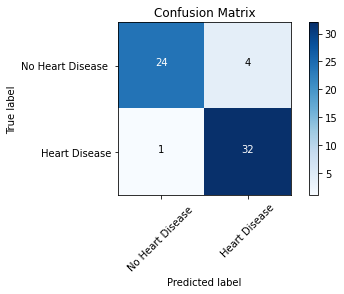

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=yh_test, y_pred=yh_pred)
cm_plot_labels = ['No Heart Disease ','Heart Disease']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Create, Train, and Visualize Model for Diabetes

In [ ]:
dmodel = Sequential()
dmodel.add(Dense(15,activation='relu',input_dim=8))
dmodel.add(Dropout(0.5))
dmodel.add(Dense(1,activation='sigmoid'))
print(dmodel.summary())
dmodel.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 15)                135       
_________________________________________________________________
dropout_11 (Dropout)         (None, 15)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 16        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
diabetes_model = Sequential()
diabetes_model.add(Dense(units=10, input_dim=8, kernel_initializer='uniform', activation='relu'))
diabetes_model.add(Dropout(0.4))
diabetes_model.add(Dense(units=3, input_dim=8, kernel_initializer='uniform', activation='relu'))
diabetes_model.add(Dropout(0.4))
diabetes_model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
print(diabetes_model.summary())
diabetes_model.compile(loss = 'binary_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 10)                90        
_________________________________________________________________
dropout_12 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 3)                 33        
_________________________________________________________________
dropout_13 (Dropout)         (None, 3)                 0         
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 4         
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Normalize Data

In [ ]:
# split data into X and Y train
Yd = diabetes[['Outcome']]
Xd = diabetes.drop(['Outcome'],axis=1)
normalizeData(Xd, Yd)

In [ ]:
# Split data into train and test
Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd, Yd, test_size=0.2, random_state=43)

In [ ]:
train_history = dmodel.fit(x=Xd_train, y = yd_train, validation_split=0.2, epochs=250, batch_size=25, verbose=2)

Epoch 1/250
20/20 - 0s - loss: 25.9233 - accuracy: 0.5886 - val_loss: 12.8763 - val_accuracy: 0.6911
Epoch 2/250
20/20 - 0s - loss: 23.0681 - accuracy: 0.5642 - val_loss: 9.5473 - val_accuracy: 0.6911
Epoch 3/250
20/20 - 0s - loss: 19.9658 - accuracy: 0.5601 - val_loss: 7.7651 - val_accuracy: 0.6585
Epoch 4/250
20/20 - 0s - loss: 17.8199 - accuracy: 0.5662 - val_loss: 6.0463 - val_accuracy: 0.6667
Epoch 5/250
20/20 - 0s - loss: 17.2971 - accuracy: 0.5173 - val_loss: 5.4781 - val_accuracy: 0.6748
Epoch 6/250
20/20 - 0s - loss: 14.6478 - accuracy: 0.5438 - val_loss: 5.3218 - val_accuracy: 0.6585
Epoch 7/250
20/20 - 0s - loss: 13.9814 - accuracy: 0.5214 - val_loss: 4.5518 - val_accuracy: 0.6667
Epoch 8/250
20/20 - 0s - loss: 12.0239 - accuracy: 0.5255 - val_loss: 4.0929 - val_accuracy: 0.6504
Epoch 9/250
20/20 - 0s - loss: 11.1130 - accuracy: 0.5234 - val_loss: 3.7978 - val_accuracy: 0.6423
Epoch 10/250
20/20 - 0s - loss: 10.1886 - accuracy: 0.5560 - val_loss: 3.3068 - val_accuracy: 0.658

In [ ]:
train_history_d = diabetes_model.fit(x=Xd_train, y = yd_train, validation_split=0.2, epochs=300, batch_size=25, verbose=2)

Epoch 1/300
20/20 - 0s - loss: 0.6840 - accuracy: 0.6375 - val_loss: 0.6652 - val_accuracy: 0.6992
Epoch 2/300
20/20 - 0s - loss: 0.6674 - accuracy: 0.6497 - val_loss: 0.6463 - val_accuracy: 0.6992
Epoch 3/300
20/20 - 0s - loss: 0.6603 - accuracy: 0.6436 - val_loss: 0.6351 - val_accuracy: 0.6992
Epoch 4/300
20/20 - 0s - loss: 0.6567 - accuracy: 0.6375 - val_loss: 0.6276 - val_accuracy: 0.6992
Epoch 5/300
20/20 - 0s - loss: 0.6520 - accuracy: 0.6415 - val_loss: 0.6226 - val_accuracy: 0.6992
Epoch 6/300
20/20 - 0s - loss: 0.6526 - accuracy: 0.6375 - val_loss: 0.6183 - val_accuracy: 0.6992
Epoch 7/300
20/20 - 0s - loss: 0.6354 - accuracy: 0.6741 - val_loss: 0.6147 - val_accuracy: 0.6992
Epoch 8/300
20/20 - 0s - loss: 0.6511 - accuracy: 0.6354 - val_loss: 0.6140 - val_accuracy: 0.6992
Epoch 9/300
20/20 - 0s - loss: 0.6432 - accuracy: 0.6619 - val_loss: 0.6106 - val_accuracy: 0.7073
Epoch 10/300
20/20 - 0s - loss: 0.6444 - accuracy: 0.6538 - val_loss: 0.6090 - val_accuracy: 0.6992
Epoch 11/

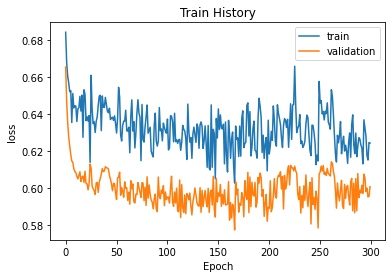

In [ ]:
#visualize the loss and accuracy after each epoch
# plot_training_history(train_history_d,'accuracy','val_accuracy')
plot_training_history(train_history_d,'loss','val_loss')

### Making Predictions with Initial Model

In [ ]:
ydi_pred_train = dmodel.predict(Xd_test)


rounded = [round(x[0]) for x in ydi_pred_train]
ydi_pred_train = rounded

from sklearn.metrics import accuracy_score
score_di = round(accuracy_score(ydi_pred_train,yd_test)*100,2)

print("The accuracy score of the initial model is: "+str(score_di)+" %")

The accuracy score of the initial model is: 68.18 %


### Make Predictions with Optimized Model

In [ ]:
yd_pred = diabetes_model.predict(Xd_test)


rounded = [round(x[0]) for x in yd_pred]
yd_pred = rounded

from sklearn.metrics import accuracy_score
score_dd = round(accuracy_score(yd_pred,yd_test)*100,2)

print("The accuracy score of the optimized model on the Test set is: "+str(score_dd)+" %")

The accuracy score of the optimized model on the Test set is: 65.58 %


Confusion matrix, without normalization
[[97  3]
 [46  8]]


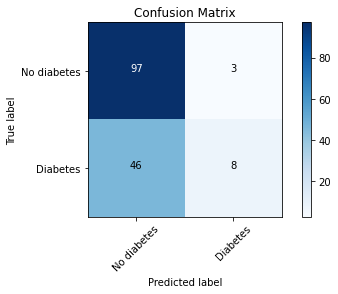

In [ ]:
cm = confusion_matrix(y_true=yd_test, y_pred=ydi_pred_train)
cm_plot_labels = ['No diabetes','Diabetes']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Create, Train, and Visualize Model for Breast Cancer

In [ ]:
bmodel = Sequential()
bmodel.add(Dense(10,activation='relu',input_dim=8))
bmodel.add(Dense(1,activation='sigmoid'))
print(bmodel.summary())
bmodel.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 11        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
bcancer_model = Sequential()
bcancer_model.add(Dense(units=7, input_dim=8, kernel_initializer='uniform', activation='relu'))
bcancer_model.add(Dropout(0.4))
bcancer_model.add(Dense(units=3, input_dim=8, kernel_initializer='uniform', activation='relu'))
bcancer_model.add(Dropout(0.4))
bcancer_model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
print(bcancer_model.summary())
bcancer_model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 7)                 63        
_________________________________________________________________
dropout_14 (Dropout)         (None, 7)                 0         
_________________________________________________________________
dense_33 (Dense)             (None, 3)                 24        
_________________________________________________________________
dropout_15 (Dropout)         (None, 3)                 0         
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 4         
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
bcancer_df.head(20)

,concave points_worst,concave points_mean,perimeter_worst,perimeter_mean,radius_worst,radius_mean,area_worst,area_mean,diagnosis
0,0.26540,0.14710,184.60,122.80,25.38,17.99,2019.0,1001.0,1
1,0.18600,0.07017,158.80,132.90,24.99,20.57,1956.0,1326.0,1
2,0.24300,0.12790,152.50,130.00,23.57,19.69,1709.0,1203.0,1
3,0.25750,0.10520,98.87,77.58,14.91,11.42,567.7,386.1,1
4,0.16250,0.10430,152.20,135.10,22.54,20.29,1575.0,1297.0,1
5,0.17410,0.08089,103.40,82.57,15.47,12.45,741.6,477.1,1
6,0.19320,0.07400,153.20,119.60,22.88,18.25,1606.0,1040.0,1
7,0.15560,0.05985,110.60,90.20,17.06,13.71,897.0,577.9,1
8,0.20600,0.09353,106.20,87.50,15.49,13.00,739.3,519.8,1
9,0.22100,0.08543,97.65,83.97,15.09,12.46,711.4,475.9,1


In [ ]:
bcancer_df['area_mean'].max()

2501.0

### Normarlize data




In [ ]:
# split data into X and Y train
Yb = bcancer_df[['diagnosis']]
Xb = bcancer_df.drop(['diagnosis'],axis=1)
normalizeData(Xb, Yb)

In [ ]:
# Split data into train and test
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, Yb, test_size=0.2, random_state=43)

In [ ]:
train_history_bi = bmodel.fit(x=Xb_train, y = yb_train, validation_split=0.2, epochs=300, batch_size=25, verbose=2)

Epoch 1/300
15/15 - 0s - loss: 45.4675 - accuracy: 0.6401 - val_loss: 36.4434 - val_accuracy: 0.5385
Epoch 2/300
15/15 - 0s - loss: 14.8968 - accuracy: 0.5852 - val_loss: 5.0565 - val_accuracy: 0.6044
Epoch 3/300
15/15 - 0s - loss: 4.7795 - accuracy: 0.4753 - val_loss: 5.5280 - val_accuracy: 0.5495
Epoch 4/300
15/15 - 0s - loss: 3.3778 - accuracy: 0.6099 - val_loss: 4.6371 - val_accuracy: 0.7802
Epoch 5/300
15/15 - 0s - loss: 2.8150 - accuracy: 0.7060 - val_loss: 4.5398 - val_accuracy: 0.8022
Epoch 6/300
15/15 - 0s - loss: 2.5013 - accuracy: 0.7308 - val_loss: 4.4703 - val_accuracy: 0.7912
Epoch 7/300
15/15 - 0s - loss: 2.4375 - accuracy: 0.7500 - val_loss: 4.5772 - val_accuracy: 0.8132
Epoch 8/300
15/15 - 0s - loss: 2.3857 - accuracy: 0.7527 - val_loss: 4.5127 - val_accuracy: 0.8132
Epoch 9/300
15/15 - 0s - loss: 2.3568 - accuracy: 0.7582 - val_loss: 4.3999 - val_accuracy: 0.8242
Epoch 10/300
15/15 - 0s - loss: 2.3221 - accuracy: 0.7610 - val_loss: 4.4625 - val_accuracy: 0.8132
Epoch 

In [ ]:
train_history_b = bcancer_model.fit(x=Xb_train, y = yb_train, validation_split=0.2, epochs=300, batch_size=25, verbose=2)

Epoch 1/300
15/15 - 0s - loss: 0.6871 - accuracy: 0.5247 - val_loss: 0.6768 - val_accuracy: 0.4615
Epoch 2/300
15/15 - 0s - loss: 0.6844 - accuracy: 0.5467 - val_loss: 0.6748 - val_accuracy: 0.5604
Epoch 3/300
15/15 - 0s - loss: 0.6836 - accuracy: 0.5522 - val_loss: 0.6707 - val_accuracy: 0.6593
Epoch 4/300
15/15 - 0s - loss: 0.6814 - accuracy: 0.5055 - val_loss: 0.6719 - val_accuracy: 0.8571
Epoch 5/300
15/15 - 0s - loss: 0.6777 - accuracy: 0.5824 - val_loss: 0.6730 - val_accuracy: 0.8571
Epoch 6/300
15/15 - 0s - loss: 0.6723 - accuracy: 0.6786 - val_loss: 0.6657 - val_accuracy: 0.8681
Epoch 7/300
15/15 - 0s - loss: 0.6655 - accuracy: 0.6181 - val_loss: 0.6544 - val_accuracy: 0.9231
Epoch 8/300
15/15 - 0s - loss: 0.6563 - accuracy: 0.6703 - val_loss: 0.6495 - val_accuracy: 0.8681
Epoch 9/300
15/15 - 0s - loss: 0.6539 - accuracy: 0.6703 - val_loss: 0.6433 - val_accuracy: 0.8571
Epoch 10/300
15/15 - 0s - loss: 0.6443 - accuracy: 0.7335 - val_loss: 0.6196 - val_accuracy: 0.9231
Epoch 11/

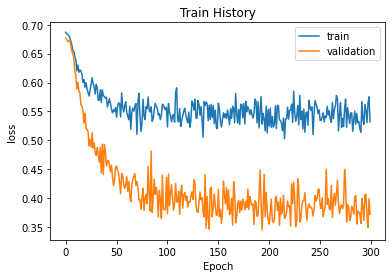

In [ ]:
 #visualize the loss and accuracy after each epoch
# plot_training_history(train_history_b,'accuracy','val_accuracy')
plot_training_history(train_history_b,'loss','val_loss')

Making Predictions with initial Model

In [ ]:
ybi_pred_train = bmodel.predict(Xb_test)


rounded = [round(x[0]) for x in ybi_pred_train]
ybi_pred_train = rounded

from sklearn.metrics import accuracy_score
score_bi = round(accuracy_score(ybi_pred_train,yb_test)*100,2)

print("The accuracy score of the model on the Training set is: "+str(score_bi)+" %")

The accuracy score of the model on the Training set is: 94.74 %


### Make Predictions with optimized Model

In [ ]:
yb_pred_train = bcancer_model.predict(Xb_test)


rounded = [round(x[0]) for x in yb_pred_train]
yb_pred_train = rounded

from sklearn.metrics import accuracy_score
score_b = round(accuracy_score(yb_pred_train,yb_test)*100,2)

print("The accuracy score of the model on the Training set is: "+str(score_b)+" %")

The accuracy score of the model on the Training set is: 93.86 %


Confusion matrix, without normalization
[[72  3]
 [ 3 36]]


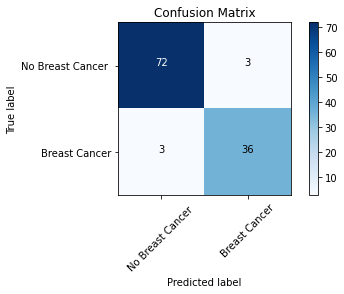

In [ ]:
cm = confusion_matrix(y_true=yb_test, y_pred=ybi_pred_train)
cm_plot_labels = ['No Breast Cancer ','Breast Cancer']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Create, Train, and Visualize Model for Cervical Cancer

In [ ]:
cmodel = Sequential()
cmodel.add(Dense(12,activation='relu',input_dim=8))
cmodel.add(Dense(1,activation='sigmoid'))
print(cmodel.summary())
cmodel.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 13        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
ccancer_model = Sequential()
ccancer_model.add(Dense(units=7, input_dim=8, kernel_initializer='uniform', activation='relu'))
ccancer_model.add(Dropout(0.3))
ccancer_model.add(Dense(units=3, input_dim=8, kernel_initializer='uniform', activation='relu'))
ccancer_model.add(Dropout(0.3))
ccancer_model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
opt = tf.keras.optimizers.Adam(learning_rate=0.02)
print(ccancer_model.summary())
ccancer_model.compile(loss = 'binary_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 7)                 63        
_________________________________________________________________
dropout_16 (Dropout)         (None, 7)                 0         
_________________________________________________________________
dense_38 (Dense)             (None, 3)                 24        
_________________________________________________________________
dropout_17 (Dropout)         (None, 3)                 0         
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 4         
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
cervical_df.head()

,Dx:Cancer,Dx:HPV,Dx,STDs:genital herpes,STDs:HIV,STDs,Dx:CIN,STDs (number),Biopsy
0,0,0,0,0.0,0.0,0.0,0,0.0,0
1,0,0,0,0.0,0.0,0.0,0,0.0,0
2,0,0,0,0.0,0.0,0.0,0,0.0,0
3,1,1,0,0.0,0.0,0.0,0,0.0,0
4,0,0,0,0.0,0.0,0.0,0,0.0,0


### Normarlize data

In [ ]:
# split data into X and Y train
Yc = cervical_df[['Biopsy']]
Xc = cervical_df.drop(['Biopsy'],axis=1)
normalizeData(Xc, Yc)

In [ ]:
# Split data into train and test
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, Yc, test_size=0.2, random_state=43)

In [ ]:
train_history_ci = cmodel.fit(x=Xc_train, y = yc_train, validation_split=0.2, epochs=100, batch_size=25, verbose=2)

Epoch 1/100
22/22 - 0s - loss: 0.6846 - accuracy: 0.9106 - val_loss: 0.6710 - val_accuracy: 0.9275
Epoch 2/100
22/22 - 0s - loss: 0.6594 - accuracy: 0.9325 - val_loss: 0.6448 - val_accuracy: 0.9275
Epoch 3/100
22/22 - 0s - loss: 0.6337 - accuracy: 0.9288 - val_loss: 0.6186 - val_accuracy: 0.9275
Epoch 4/100
22/22 - 0s - loss: 0.6076 - accuracy: 0.9307 - val_loss: 0.5919 - val_accuracy: 0.9275
Epoch 5/100
22/22 - 0s - loss: 0.5816 - accuracy: 0.9325 - val_loss: 0.5642 - val_accuracy: 0.9275
Epoch 6/100
22/22 - 0s - loss: 0.5545 - accuracy: 0.9325 - val_loss: 0.5371 - val_accuracy: 0.9275
Epoch 7/100
22/22 - 0s - loss: 0.5268 - accuracy: 0.9325 - val_loss: 0.5083 - val_accuracy: 0.9275
Epoch 8/100
22/22 - 0s - loss: 0.4983 - accuracy: 0.9325 - val_loss: 0.4785 - val_accuracy: 0.9275
Epoch 9/100
22/22 - 0s - loss: 0.4695 - accuracy: 0.9325 - val_loss: 0.4501 - val_accuracy: 0.9275
Epoch 10/100
22/22 - 0s - loss: 0.4418 - accuracy: 0.9325 - val_loss: 0.4228 - val_accuracy: 0.9275
Epoch 11/

In [ ]:
train_history_c = ccancer_model.fit(x=Xc_train, y = yc_train, validation_split=0.2, epochs=100, batch_size=25, verbose=2)

Epoch 1/100
22/22 - 0s - loss: 0.5931 - accuracy: 0.9343 - val_loss: 0.4796 - val_accuracy: 0.9275
Epoch 2/100
22/22 - 0s - loss: 0.3849 - accuracy: 0.9325 - val_loss: 0.2792 - val_accuracy: 0.9275
Epoch 3/100
22/22 - 0s - loss: 0.2997 - accuracy: 0.9325 - val_loss: 0.2662 - val_accuracy: 0.9275
Epoch 4/100
22/22 - 0s - loss: 0.2755 - accuracy: 0.9325 - val_loss: 0.2607 - val_accuracy: 0.9275
Epoch 5/100
22/22 - 0s - loss: 0.2722 - accuracy: 0.9325 - val_loss: 0.2603 - val_accuracy: 0.9275
Epoch 6/100
22/22 - 0s - loss: 0.2824 - accuracy: 0.9325 - val_loss: 0.2626 - val_accuracy: 0.9275
Epoch 7/100
22/22 - 0s - loss: 0.2607 - accuracy: 0.9325 - val_loss: 0.2610 - val_accuracy: 0.9275
Epoch 8/100
22/22 - 0s - loss: 0.2631 - accuracy: 0.9325 - val_loss: 0.2605 - val_accuracy: 0.9275
Epoch 9/100
22/22 - 0s - loss: 0.2649 - accuracy: 0.9325 - val_loss: 0.2610 - val_accuracy: 0.9275
Epoch 10/100
22/22 - 0s - loss: 0.2528 - accuracy: 0.9325 - val_loss: 0.2601 - val_accuracy: 0.9275
Epoch 11/

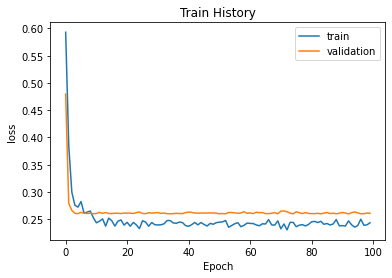

In [ ]:
#visualize the loss and accuracy after each epoch
# plot_training_history(train_history_c,'accuracy','val_accuracy')
plot_training_history(train_history_c,'loss','val_loss')

Making Predictions with Initial Model

In [ ]:
yci_pred_train = cmodel.predict(Xc_test)


rounded = [round(x[0]) for x in yci_pred_train]
yci_pred_train = rounded

from sklearn.metrics import accuracy_score
score_ci = round(accuracy_score(yci_pred_train,yc_test)*100,2)

print("The accuracy score of the model on the Training set is: "+str(score_ci)+" %")

The accuracy score of the model on the Training set is: 93.6 %


Making Predictions with Optimized Model

In [ ]:
yc_pred_train = ccancer_model.predict(Xc_test)


rounded = [round(x[0]) for x in yc_pred_train]
yc_pred_train = rounded

from sklearn.metrics import accuracy_score
score_c = round(accuracy_score(yc_pred_train,yc_test)*100,2)

print("The accuracy score of the model on the Training set is: "+str(score_c)+" %")

The accuracy score of the model on the Training set is: 95.35 %


Confusion matrix, without normalization
[[164   0]
 [  8   0]]


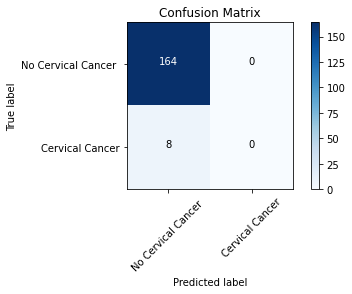

In [ ]:
cm = confusion_matrix(y_true=yc_test, y_pred=yc_pred_train)
cm_plot_labels = ['No Cervical Cancer ','Cervical Cancer']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
from keras.models import load_model
# save model and architecture to single file
heart_model.save("heart_model.h5")
print("Saved heart_model to disk")
# load model
model = load_model('heart_model.h5')
# summarize model.
model.summary()

Saved heart_model to disk
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 10)                90        
_________________________________________________________________
dropout_9 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 3)                 33        
_________________________________________________________________
dropout_10 (Dropout)         (None, 3)                 0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 4         
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# save model and architecture to single file
diabetes_model.save("diabetes_model.h5")
print("Saved diabetes model to disk")
# load model
model = load_model('diabetes_model.h5')
# summarize model.
model.summary()

Saved diabetes model to disk
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 10)                90        
_________________________________________________________________
dropout_12 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 3)                 33        
_________________________________________________________________
dropout_13 (Dropout)         (None, 3)                 0         
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 4         
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# save model and architecture to single file
bcancer_model.save("bcancer_model.h5")
print("Saved bcancer model to disk")
# load model
model = load_model('bcancer_model.h5')
# summarize model.
model.summary()

Saved bcancer model to disk
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 7)                 63        
_________________________________________________________________
dropout_14 (Dropout)         (None, 7)                 0         
_________________________________________________________________
dense_33 (Dense)             (None, 3)                 24        
_________________________________________________________________
dropout_15 (Dropout)         (None, 3)                 0         
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 4         
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# save model and architecture to single file
ccancer_model.save("ccancer_model.h5")
print("Saved ccancer model to disk")
# load model
model = load_model('ccancer_model.h5')
# summarize model.
model.summary()

Saved ccancer model to disk
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 7)                 63        
_________________________________________________________________
dropout_16 (Dropout)         (None, 7)                 0         
_________________________________________________________________
dense_38 (Dense)             (None, 3)                 24        
_________________________________________________________________
dropout_17 (Dropout)         (None, 3)                 0         
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 4         
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________
